In [69]:
import AutoOD as aod
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

import importlib
importlib.reload(aod)

data_name = "epileptic_seizure"
identifier = "npz"
init_points = 10
n_iter = 50

zipfile = np.load(f"./data_sampling/{data_name}.{identifier}", allow_pickle=True)
data, labels = zipfile["positions"], zipfile["labels"]




print(len(data))

11500


In [70]:
autood = aod.AutoOutlierDetection(
	verbose=2, init_points=init_points, n_iter=n_iter,
	detection_algorithms=["isof", "lof", "abod"]
)
results = autood.fit(data)


Fitting the data using isof algorithm.
|   iter    |  target   | max_fe... | max_sa... | n_esti... |
-------------------------------------------------------------
|  1        |  0.3522   |  0.4753   |  0.7483   |  20.02    |
|  2        |  0.4595   |  0.3721   |  0.2321   |  36.62    |
|  3        |  0.4344   |  0.2676   |  0.411    |  91.42    |
|  4        |  0.4629   |  0.5849   |  0.4773   |  143.3    |
|  5        |  0.5007   |  0.284    |  0.8903   |  24.93    |
|  6        |  0.4242   |  0.7034   |  0.4756   |  120.6    |
|  7        |  0.5213   |  0.2263   |  0.2783   |  164.1    |
|  8        |  0.4693   |  0.9714   |  0.3821   |  144.6    |
|  9        |  0.4366   |  0.8888   |  0.9051   |  35.31    |
|  10       |  0.4795   |  0.1351   |  0.2528   |  178.1    |
|  11       |  0.4795   |  0.9368   |  0.9977   |  166.1    |
|  12       |  0.4548   |  0.4973   |  0.9659   |  162.0    |
|  13       |  0.38     |  0.3917   |  0.909    |  27.01    |
|  14       |  0.4326   |  0.40

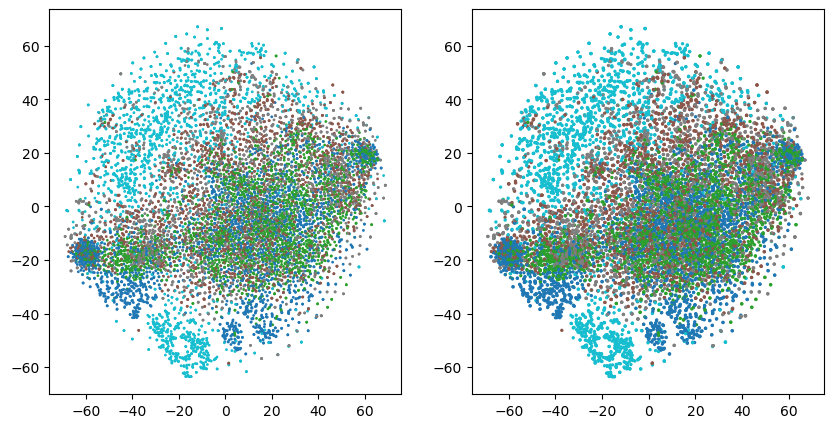

In [71]:
import json
results["prediction"] = np.array(results["prediction"])


data_wo_outliers = data[results["prediction"] == 1]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(data[:, 0], data[:, 1], s=1, c=labels, cmap="tab10")
axs[1].scatter(data_wo_outliers[:, 0], data_wo_outliers[:, 1], s=2, c=labels[results["prediction"] == 1], cmap="tab10")

plt.savefig(f"./autood_results/{data_name}_{init_points}_{n_iter}.png")
plt.savefig(f"./autood_results/{data_name}_{init_points}_{n_iter}.pdf")




In [8]:

results["prediction"] = results["prediction"].tolist()
with open(f"./autood_results/results/{data_name}_{init_points}_{n_iter}.json", "w") as f:
	json.dump(results, f)
